In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from tqdm import trange

np.random.seed(42)
random_state = np.random.get_state()

In [2]:
# state A, B
STATE_A = 0
STATE_B = 1

# use one terminal state
STATE_TERMINAL = 2

# starts from state A
STATE_START = STATE_A

# possible actions in A
ACTION_A_RIGHT = 0
ACTION_A_LEFT = 1

# possible actions in B, maybe 10 actions
ACTIONS_B = range(10)

# all possible actions
STATE_ACTIONS = [
    [ACTION_A_RIGHT, ACTION_A_LEFT],
    ACTIONS_B]

# state action pair values, if a state is a terminal state, the the value is always 0
INITIAL_Q = [
    np.zeros(2),
    np.zeros(len(ACTIONS_B)),
    np.zeros(1)]

# set up destination for each state and each action
TRANSITION = [
    [STATE_TERMINAL, STATE_B],
    [STATE_TERMINAL] * len(ACTIONS_B)]

# probability for exploration
EPSILON = 0.1

# step size
ALPHA = 0.1

# discount for max value
GAMMA = 1.0

In [3]:
# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(STATE_ACTIONS[state])
    else:
        values_ = q_value[state]
        return np.random.choice(np.argwhere(np.max(values_) == values_).flatten())

# tack @action in @state, return the reward
def take_action(state, action):
    if state == STATE_A:
        return 0
    return np.random.normal(-0.1, 1)

In [4]:
# if there are two state action pair value array, use double Q-Learning
# otherwise use normal Q-Learning
def q_learning(q1, q2=None):
    state = STATE_START
    # track the # of actio left in state A
    left_count = 0
    while state != STATE_TERMINAL:
        if q2 is None:
            action = choose_action(state, q1)
        else:
            # derive a action form Q1 and Q2
            action = choose_action(state, [item1 + item2 for item1, item2 in zip(q1, q2)])
            
        if state == STATE_A and action == ACTION_A_LEFT:
            left_count += 1

        reward = take_action(state, action)
        next_state = TRANSITION[state][action]

        if q2 is None:
            active_q = q1
            target = np.max(active_q[next_state])
        else:
            if np.random.binomial(1, 0.5) == 1:
                active_q = q1
                target_q = q2
            else:
                active_q = q2
                target_q = q1
            values_ = active_q[next_state]
            best_action = np.random.choice(np.argwhere(np.max(values_) == values_).flatten())
            target = target_q[next_state][best_action]

        # Q-Learning update
        active_q[state][action] = active_q[state][action] + ALPHA * (reward + GAMMA * target - active_q[state][action])
        state = next_state
    return left_count

In [5]:
def figure_6_7():
    # each independent run has 300 episodes
    episodes = 300
    runs = 1000

    left_counts_q = np.zeros((runs, episodes))
    left_counts_double_q = np.zeros((runs, episodes))

    np.random.set_state(random_state)
    for run in trange(runs):
        q = copy.deepcopy(INITIAL_Q)
        for ep in range(episodes):
            left_counts_q[run, ep] = q_learning(q)

    np.random.set_state(random_state)
    for run in trange(runs):
        q1 = copy.deepcopy(INITIAL_Q)
        q2 = copy.deepcopy(INITIAL_Q)
        for ep in range(episodes):
            left_counts_double_q[run, ep] = q_learning(q1, q2)
    
    left_counts_q = left_counts_q.mean(axis=0)
    left_counts_double_q = left_counts_double_q.mean(axis=0)

    plt.plot(left_counts_q, label="Q-Learning")
    plt.plot(left_counts_double_q, label="Double Q-Learning")
    plt.plot(np.ones(episodes) * 0.05, linestyle='--', label="Optimal")
    plt.xlabel("episodes")
    plt.ylabel("% left actions from A")
    plt.legend()
    plt.show()

100%|██████████| 1000/1000 [00:44<00:00, 22.40it/s]


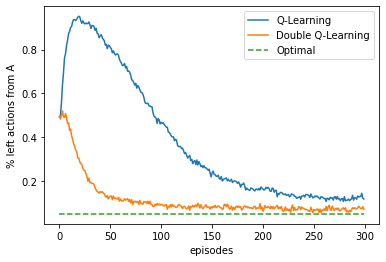

In [6]:
figure_6_7()